[1] "7c" "7d" "8c" "8d"

[1] "ID" "MD" "SD" "RW"

notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.

notch went outside hinges. Try setting notch=FALSE.



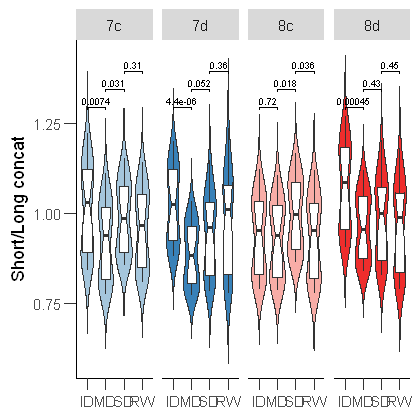

In [72]:
## short 和long 相互作用 所占据比例
options(repr.plot.width=3.5,repr.plot.height=3.5)
rm(list = ls())
setwd('G:/Billfish/boyang/HiC/compartment/100k/cworld/SVL')
library(ggplot2)
library(ggpubr)
library(reshape2)
df <- read.csv('7d_7c_8d_8c_SVL.txt', sep = '\t', header = T)
df_long <- melt(df, id.vars = c('chrs', 'tags'))
tg <- list(c('ID', 'MD'), c('MD', 'SD'), c('SD','RW'))
df_long <- within(df_long, tags <- factor(tags, levels = c("7c", "7d", "8c", "8d")))
with(df_long, levels(tags))
df_long <- within(df_long, variable <- factor(variable, levels = c("ID", "MD", "SD", "RW")))
with(df_long, levels(variable))
# df_A <- df_long[df_long$subg=='At', ]
# print(df_A)
fg <- ggplot(df_long,aes(x=variable, y=value))+
geom_violin(trim=F, aes(fill=tags))+
geom_boxplot( outlier.colour = NA, notch=TRUE, width=0.5)+
labs(x=NULL, y='Short/Long concat')+
facet_grid(.~tags)+
#coord_cartesian(ylim = c(0, 0.35)) +
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm')
     )+
geom_signif(comparisons = tg, step_increase = 0.1,test =t.test, tip_length=0.01, textsize = 2)+
scale_fill_manual(values=c('#A5C6DC', "#3881B8","#F8ADA7", "#EE2D2C" ))
fg
ggsave(plot =fg, filename = '7d_7c_8d_8c_SVL.pdf', height =3.5, width = 4)
# #ggsave(plot =fg, filename = '100k_subg_rich.pdf', height =3.5, width = 3,  dpi = 300)

[1] "7cID" "7cMD" "7cSD" "7cRW" "7dID" "7dMD" "7dSD" "7dRW" "8cID" "8cMD"
[11] "8cSD" "8cRW" "8dID" "8dMD" "8dSD" "8dRW"

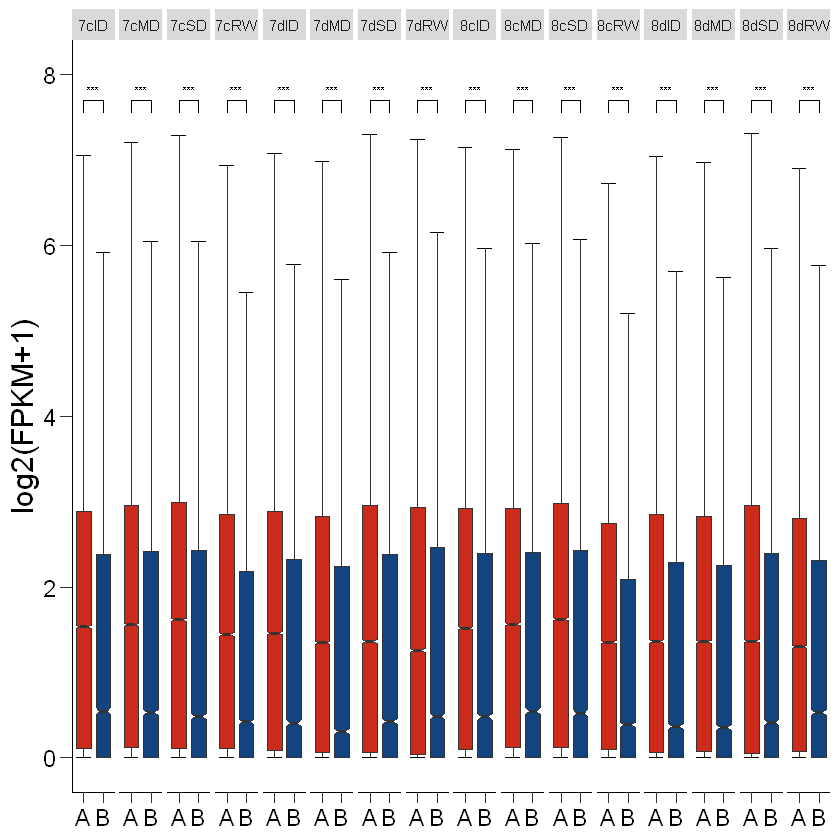

In [34]:
## short 和long 相互作用 所占据比例
#options(repr.plot.width=3.5,repr.plot.height=3.5)
rm(list = ls())
setwd('G:/Billfish/boyang/HiC/compartment/100k/cworld')
library(ggplot2)
library(ggpubr)
library(reshape2)
df <- read.csv('J668_ABcpt_all_gene_fpkm.bed',  header = T)
df <- within(df, Sample <- factor(Sample, levels = c("7cID", "7cMD", "7cSD", "7cRW", '7dID', '7dMD', '7dSD', '7dRW', "8cID", "8cMD", "8cSD", "8cRW", '8dID', '8dMD', '8dSD', '8dRW')))
with(df, levels(Sample))
tg <- list(c('A', 'B'))
fg <- ggplot(df,aes(x=ABcpt, y=log2(FPKM+1), fill=ABcpt))+
stat_boxplot(geom='errorbar')+
geom_boxplot( outlier.colour = NA, notch=TRUE)+
labs(x=NULL, y='log2(FPKM+1)')+
coord_cartesian(ylim = c(0, 8)) +
facet_grid(.~Sample)+
theme(panel.background = element_blank(), 
     panel.grid = element_blank(),
     axis.line=element_line(linetype=1,color="black"),
     legend.position='none',
     axis.ticks.length = unit(0.25, 'cm'),
     panel.spacing.x = unit(0.1, "cm"),
     axis.text.x = element_text(size=14, color="black"),
     axis.text.y = element_text(size=14, color="black"),
     axis.title.y = element_text(size=18)
     )+
geom_signif(comparisons = tg, step_increase = 0.1,test =t.test, tip_length=0.01, textsize = 2, y_position=7, map_signif_level = T)+
scale_fill_manual(values=c( '#CA2B1A' ,'#14447E'))
fg
ggsave(plot =fg, filename = 'J668_ABcpt_all_gene_fpkm.pdf', height =6, width = 8)
